# Jupyter Data Science Workflow
### From exploratory analysis to reproducible science
*Spencer Tollefson*

*Home in his living room*

In [19]:
import pandas as pd
import numpy as np
import os
%matplotlib inline

In [20]:
URL = "https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD"

In [21]:
def get_fremont_data(filename='fremont.csv', url=URL, force_download=False):
    if force_download or not os.path.exists(filename):
        Fremont = pd.read_csv(URL)
        Fremont.to_csv('fremont.csv')
    data=pd.read_csv('fremont.csv', index_col='Date', parse_dates=True)
    data.drop(columns = "Unnamed: 0", inplace=True)
    data.columns = ('West', 'East')
    data['Total'] = data.West + data.East
    return data

In [22]:
data = get_fremont_data()

In [23]:
!head Fremont.csv

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,9.0,4.0
1,10/03/2012 01:00:00 AM,6.0,4.0
2,10/03/2012 02:00:00 AM,1.0,1.0
3,10/03/2012 03:00:00 AM,3.0,2.0
4,10/03/2012 04:00:00 AM,1.0,6.0
5,10/03/2012 05:00:00 AM,10.0,21.0
6,10/03/2012 06:00:00 AM,50.0,105.0
7,10/03/2012 07:00:00 AM,95.0,257.0
8,10/03/2012 08:00:00 AM,146.0,291.0


In [24]:
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


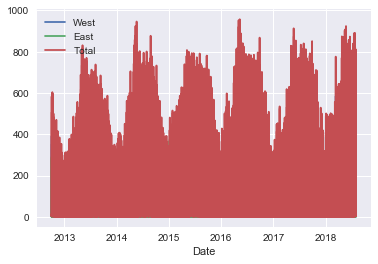

In [25]:
data.plot()

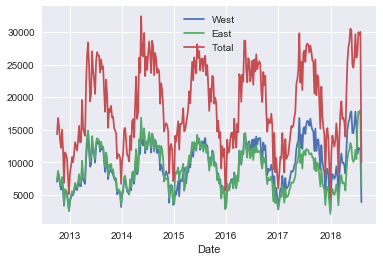

In [26]:
data.resample('W').sum().plot();

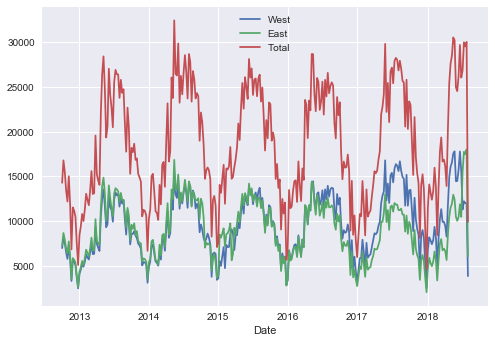

In [27]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

data.resample('W').sum().plot();

(0, 1077645.85)

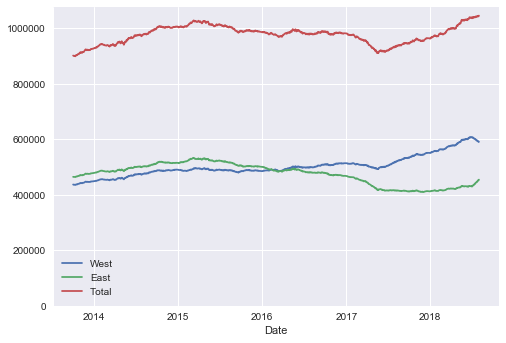

In [28]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None)

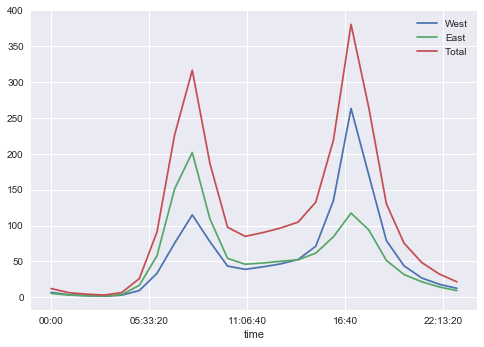

In [13]:
data.groupby(data.index.time).mean().plot();

In [14]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


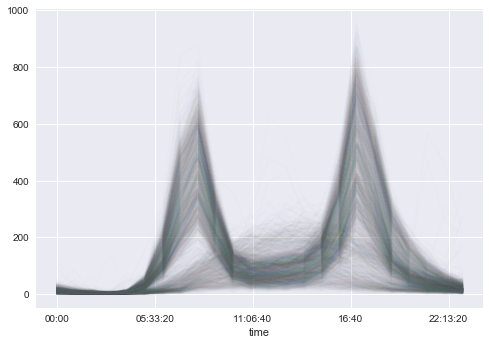

In [15]:
pivoted.plot(legend=False, alpha = 0.01);